**Curtis Zhuang**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pca_cov import PCA_COV
from pca_svd import PCA_SVD

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [6]:
# Create PCA_SVD object here
iris_data = pd.read_csv('data/iris.csv')
print(iris_data)
pca = PCA_SVD(iris_data)

     sepalLength  sepalWidth  petalLength  petalWidth  species
0            5.1         3.5          1.4         0.2        0
1            4.9         3.0          1.4         0.2        0
2            4.7         3.2          1.3         0.2        0
3            4.6         3.1          1.5         0.2        0
4            5.0         3.6          1.4         0.2        0
..           ...         ...          ...         ...      ...
145          6.7         3.0          5.2         2.3        2
146          6.3         2.5          5.0         1.9        2
147          6.5         3.0          5.2         2.0        2
148          6.2         3.4          5.4         2.3        2
149          5.9         3.0          5.1         1.8        2

[150 rows x 5 columns]


In [7]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (149, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvalues:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n [ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvalues:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

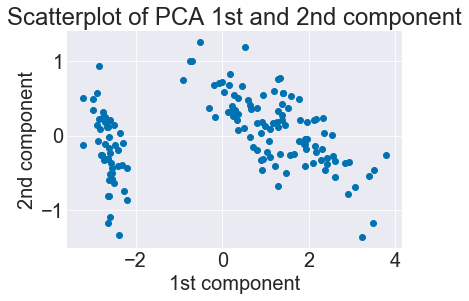

In [8]:
plt.scatter(pca.pca_project([0,1])[:,0],pca.pca_project([0,1])[:,1])
plt.title('Scatterplot of PCA 1st and 2nd component')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [9]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

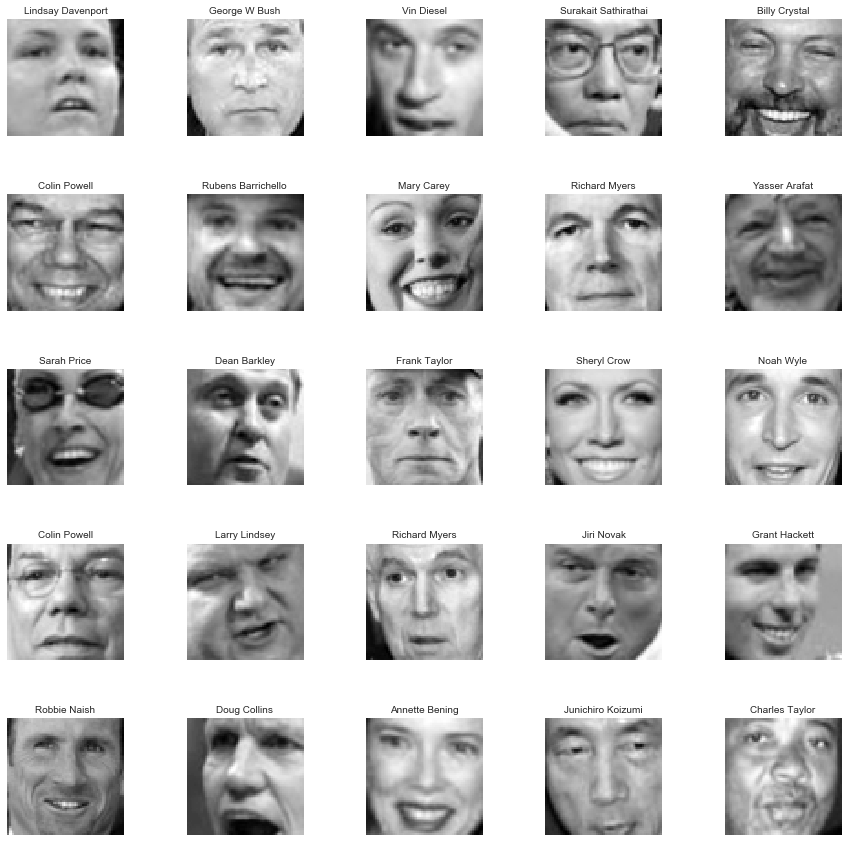

In [10]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (15,15))
    
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    n = 0
    
    for i in range(5):
        
        for j in range(5):
            
            ax[i, j].imshow(face_imgs[n],cmap=plt.get_cmap('gray'))
            
            ax[i,j].set_yticks([])
            
            ax[i,j].set_xticks([])
            
            ax[i,j].set_title(face_names[n], size = 10)
            
            n += 1
    
face_plot(face_imgs, face_names)

### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

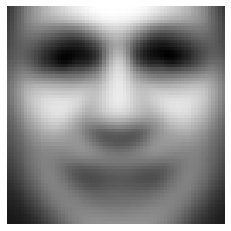

In [11]:
face = face_imgs[0]

for i in face_imgs:
    
    face = face + i
    
mean = face/len(face_imgs)

plt.imshow(mean,cmap=plt.get_cmap('gray'))

plt.yticks([])

plt.xticks([])

plt.show()

**Question 6:** What does the "mean face" image represent?

**Question 6 answer: It represents how average of all faces looks like**

### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [12]:
face_imgs_vec = face_imgs.reshape(13231, 4096)

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [29]:
import time

df = pd.DataFrame(face_imgs_vec)

# start time
start = time.time()

# pca
svd = PCA_SVD(data_frame)

var = np.arange(4096)

svd.pca(var)

# end time
end = time.time()

last = end - start

print(last)

89.59826683998108


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

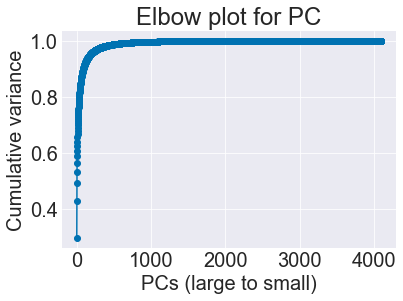

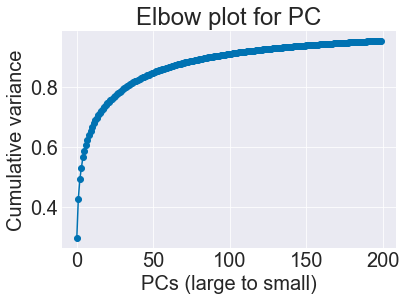

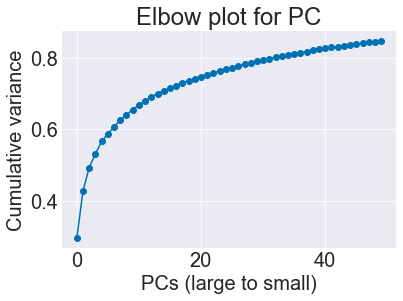

In [41]:
svd.elbow_plot()

plt.show()

# reasonable number: 200

svd.elbow_plot(200)

plt.show()

svd.elbow_plot(50)


### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [54]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    d1,d2 = reconstucted_imgs.shape
    
    d3 = int(np.sqrt(d2))
    
    orig_imgs = reconstucted_imgs.reshape(d1,d3,d3)
    
    return orig_imgs

ori = make_imgs(face_imgs_vec)


#### 50% variance face grid

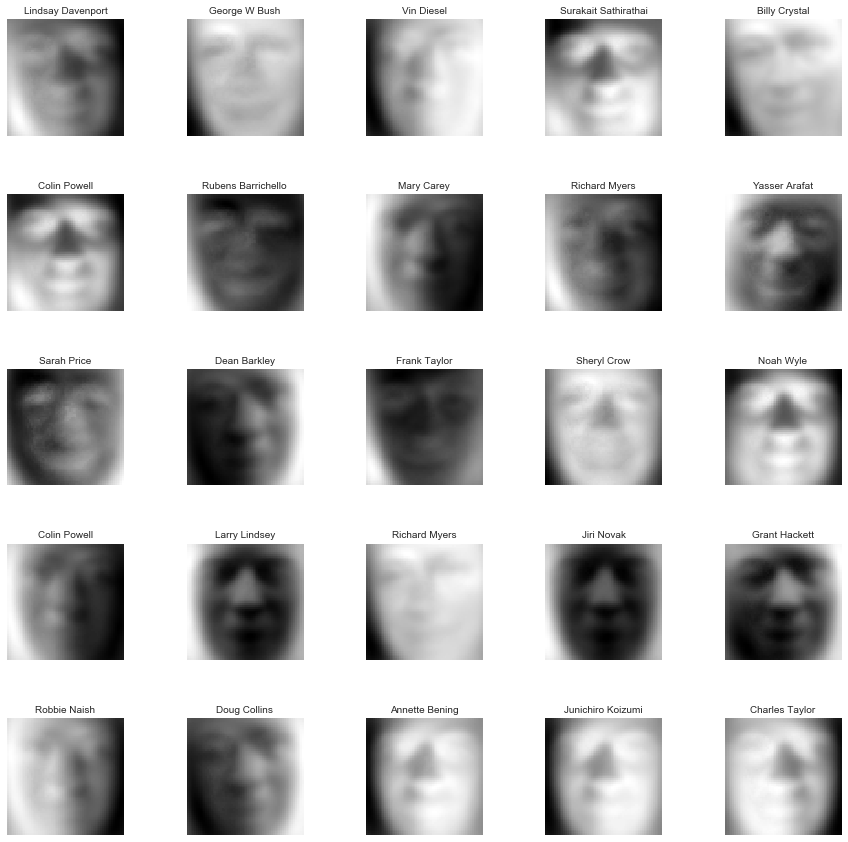

In [60]:
# from elbow plot we can get the number of PCs needed

# plot PC = 4

vec = svd.pca_then_project_back(4)

ori = make_imgs(vec)

face_plot(ori, face_names)

#### 70% variance face grid

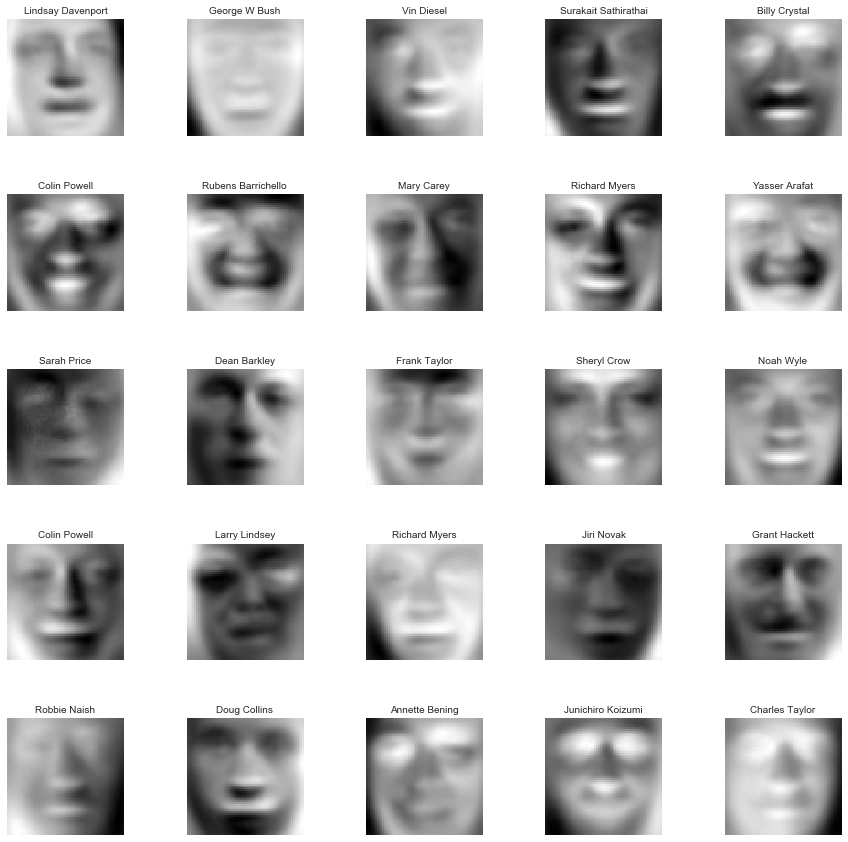

In [61]:
# from elbow plot we can get the number of PCs needed

# plot PC = 16

vec = svd.pca_then_project_back(16)

ori = make_imgs(vec)

face_plot(ori, face_names)

#### 80% variance face grid

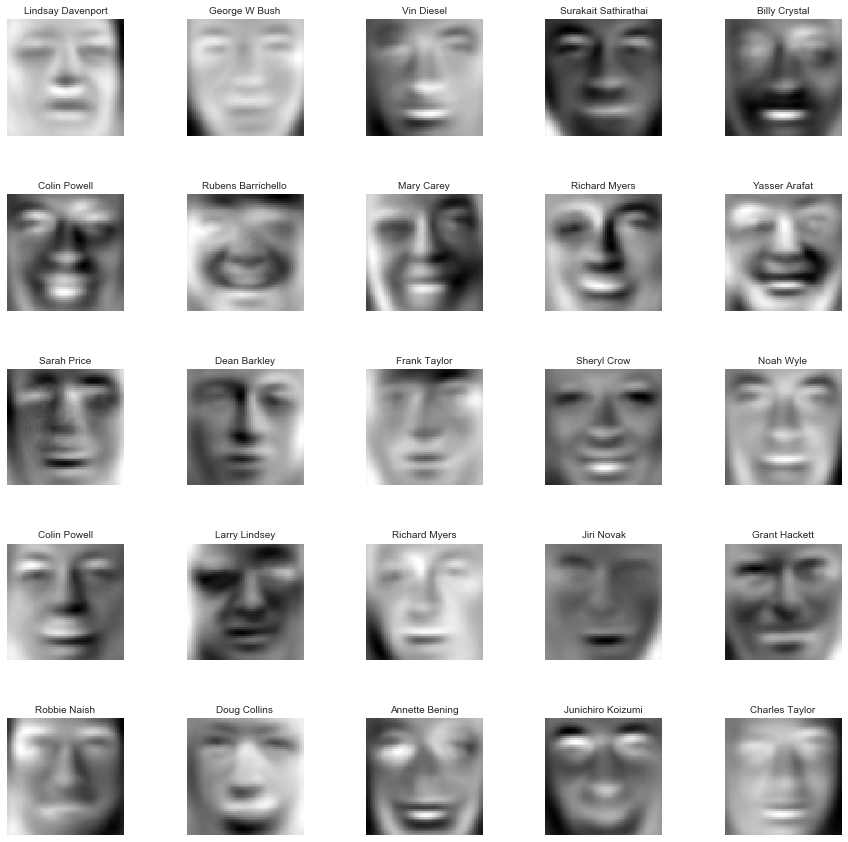

In [62]:
# from elbow plot we can get the number of PCs needed

# plot PC = 34

vec = svd.pca_then_project_back(34)

ori = make_imgs(vec)

face_plot(ori, face_names)

#### 95% variance face grid

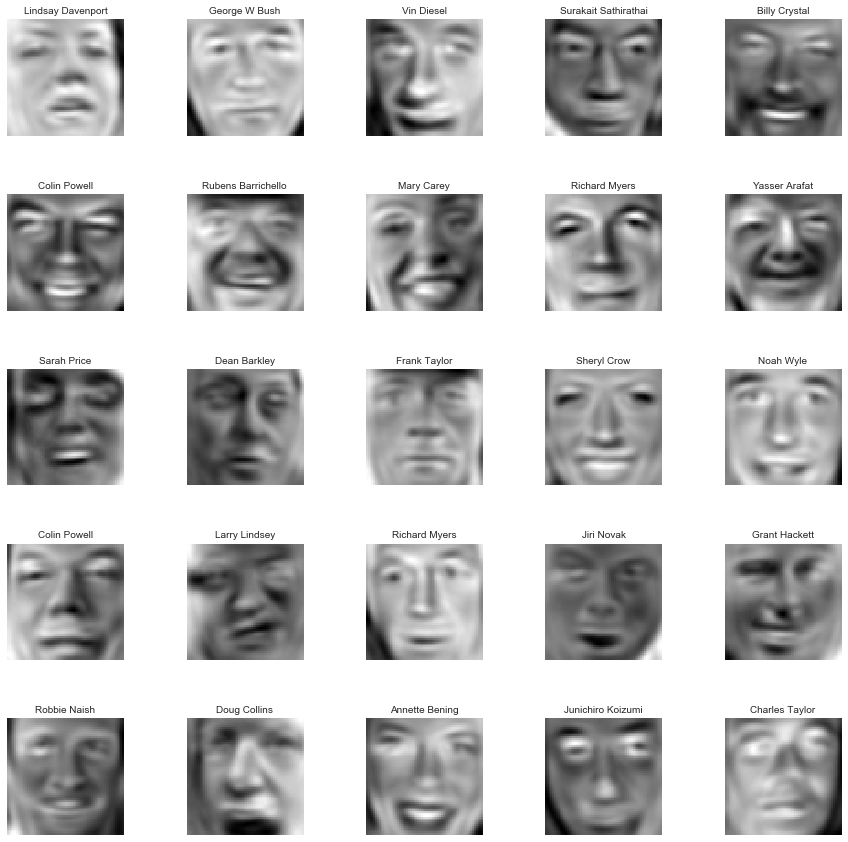

In [63]:
# from elbow plot we can get the number of PCs needed

# plot PC = 150

vec = svd.pca_then_project_back(150)

ori = make_imgs(vec)

face_plot(ori, face_names)

**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer: Based on elbow plot, we know how many PCs to use**

## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [56]:
df = pd.DataFrame(face_imgs_vec)

start = time.time()

spca = PCA_COV(df)

vec = np.arange(4096)

spca.pca(vec)

end = time.time()

last = end - start

print(last)

35.5923957824707


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:**

### 5b) Stability comparison

In the cell below compute the difference between:
- eigenvalues
- eigenvectors

obtained from the two approaches. Sum up the **absolute differences** and print out the resulting float value.

In [59]:
# vals
val_dff = np.abs(svd.get_eigenvalues()-spca.get_eigenvalues())
print(val_dff.sum())

# vecs
vec_dff = np.abs(svd.get_eigenvectors() - spca.get_eigenvectors())
print(vec_dff.sum())

690.9216791747905
271048.8813694604


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:**

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, loading plot, proportion variance explained, etc) to inform your analysis and exploration. 
- Do PCA and SVD based PCA yield different results?

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.